In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential

import keras
from IPython import display # If using IPython, Colab or Jupyter


In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
unic_data = np.load("../Assets/Unicode_Data.npy")

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [15]:
x_train = np.concatenate((trainX/256, unic_data), axis=0)
x_train = np.concatenate((x_train,testX/256), axis=0)

In [16]:
x_train.shape
np.random.shuffle(x_train)


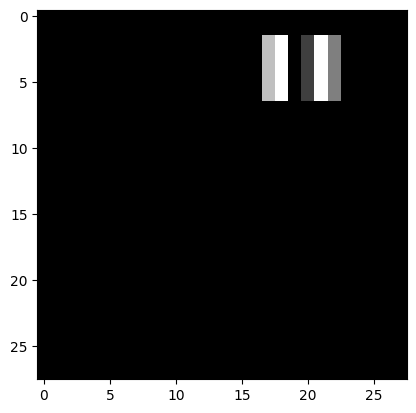

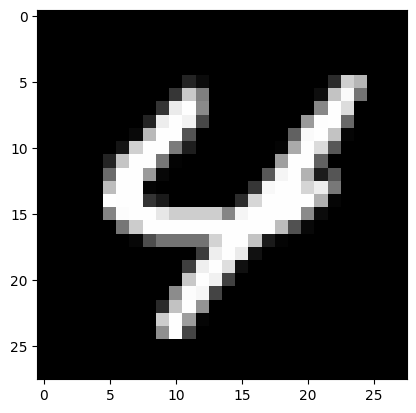

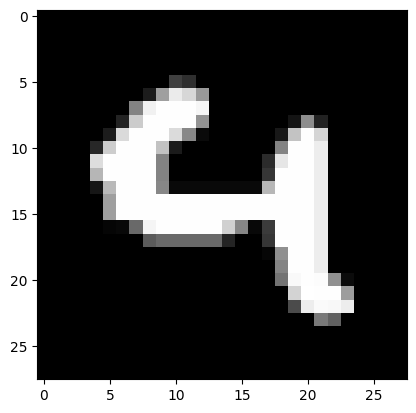

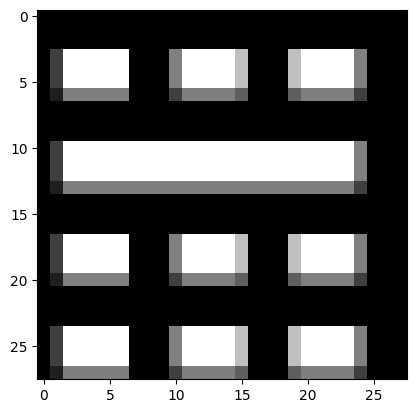

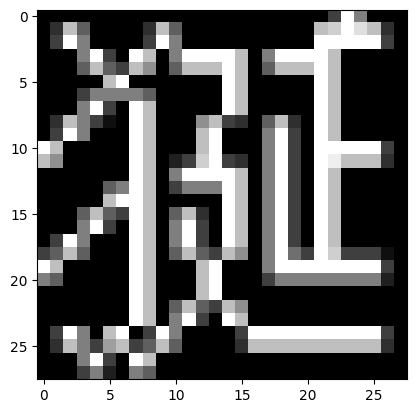

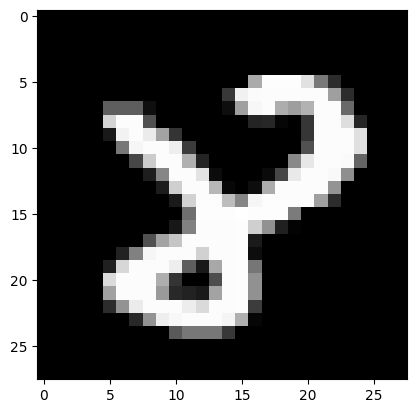

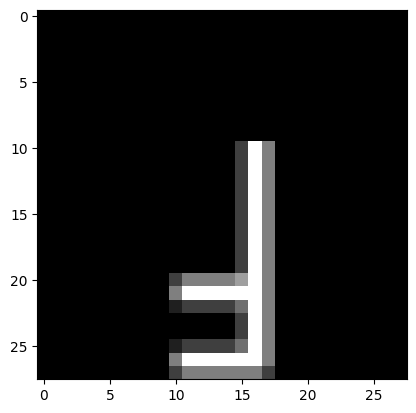

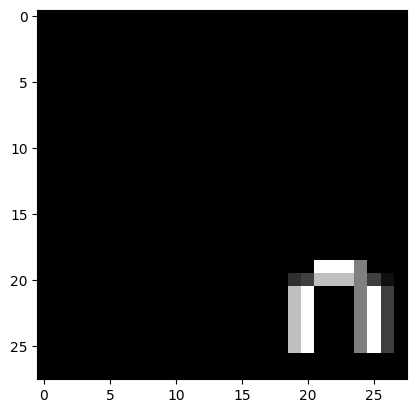

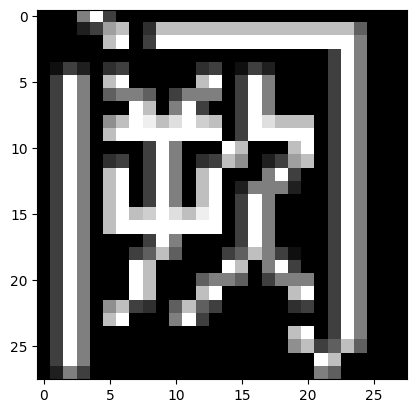

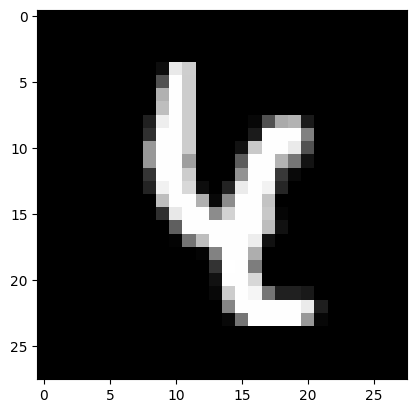

In [17]:
for i in range(10):
    plt.imshow(x_train[i], cmap = "gray")
    plt.show()

In [18]:
for i in range(184,201,4):
  LATENT_SIZE = i

#for i in range(1):
  #LATENT_SIZE = 50

  #model1
  '''
  encoder = Sequential([
      Flatten(input_shape = (28, 28)),
      Dense(784, activation="relu"),
      Dropout(0.1),
      Dense(512, activation="relu"),
      Dropout(0.1),
      Dense(256, activation="relu"),
      Dropout(0.1),
      Dense(128, activation="relu"),
      Dropout(0.1),
      Dense(LATENT_SIZE, activation="relu"),
  ])

  decoder = Sequential([
      Dense(128, input_shape = (LATENT_SIZE,),activation="relu"),
      Dropout(0.1),
      Dense(256,activation="relu"),
      Dropout(0.1),
      Dense(512,activation="sigmoid"),
      Dropout(0.1),
      Dense(784,activation="sigmoid"),
      Reshape((28, 28))
  ])
  '''
  #model 2
  '''
  encoder = Sequential([
      Flatten(input_shape = (28, 28)),
      Dense(784, activation="relu"),
      Dropout(0.1),
      Dense(392, activation="relu"),
      Dropout(0.1),
      Dense(LATENT_SIZE, activation="relu"),
  ])

  decoder = Sequential([
      Dense(392, input_shape = (LATENT_SIZE,),activation="sigmoid"),
      Dropout(0.1),
      Dense(784,activation="sigmoid"),
      Reshape((28, 28))
  ])

  img = Input(shape = (28, 28))
  latent_vector = encoder(img)
  output = decoder(latent_vector)
  model = Model(inputs = img, outputs = output)
  '''
  #model 3
  '''
  encoder = Sequential([
      Flatten(input_shape = (28, 28)),
      Dense(784, activation="relu"),
      Dropout(0.1),
      Dense(512, activation="relu"),
      Dropout(0.1),
      Dense(256, activation="relu"),
      Dropout(0.1),
      Dense(LATENT_SIZE, activation="relu"),
  ])

  decoder = Sequential([
      Dense(256, input_shape = (LATENT_SIZE,),activation="sigmoid"),
      Dropout(0.1),
      Dense(512,activation="sigmoid"),
      Dropout(0.1),
      Dense(784,activation="sigmoid"),
      Reshape((28, 28))
  ])
  '''
  #model 4 only size 50
  encoder = Sequential([
      Flatten(input_shape = (28, 28)),
      Dropout(0.1),
      Dense(512, activation="relu"),
      Dropout(0.1),
      Dense(256, activation="relu"),
      Dropout(0.1),
      Dense(LATENT_SIZE, activation="relu"),
  ])

  decoder = Sequential([
      Dense(256, input_shape = (LATENT_SIZE,),activation="sigmoid"),
      Dropout(0.1),
      Dense(512,activation="sigmoid"),
      Dropout(0.1),
      Dense(784,activation="sigmoid"),
      Reshape((28, 28))
  ])

  img = Input(shape = (28, 28))
  latent_vector = encoder(img)
  output = decoder(latent_vector)
  model = Model(inputs = img, outputs = output)

  model.compile("nadam", loss = "mse")

  print("Latent Space : " , LATENT_SIZE)
  print()
  model.summary()
  encoder.summary()
  decoder.summary()

  model.fit(x_train, x_train,epochs=50, batch_size = 128,shuffle = True)

  model.save(f'Models/auto_enc_decDense4{LATENT_SIZE}.keras')
  encoder.save(f'Models/encDense4{LATENT_SIZE}.keras')
  decoder.save(f'Models/decDense4{LATENT_SIZE}.keras')
  display.clear_output()


Latent Space :  184

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential (Sequential)     (None, 184)               580536    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            581136    
                                                                 
Total params: 1161672 (4.43 MB)
Trainable params: 1161672 (4.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                

KeyboardInterrupt: 

Run from here to Evaulate models

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
x_train = np.load("../Assets/TrainingDataFinal.npy")

for model 2 graph : range should be 8,129,4
for model 3 graph : range should be 8,201,4

In [ ]:
from keras.models import load_model

to_be_plotted_mse = []

for i in range(8,129,4):
  model = load_model(f'Models/auto_enc_decDense2{i}.keras')
  print(f'Models/auto_enc_decDense2{i}.keras')

  model.compile("nadam", loss = "mse")
  loss = model.evaluate(x_train, x_train)
  print(f'MSE Loss: {loss}')
  print("-------------------------------------------------------------------------------------")
  print()
  to_be_plotted_mse.append(loss)



In [ ]:
from keras.models import load_model

model = load_model(f'Models/auto_enc_decDense352.keras')
print(f'Models/auto_enc_decDense350.keras')

model.compile("nadam", loss = "mse")
loss = model.evaluate(x_train, x_train)
print(f'MSE Loss: {loss}')
print("-------------------------------------------------------------------------------------")
print()

model = load_model(f'Models/auto_enc_decDense450.keras')
print(f'Models/auto_enc_decDense450.keras')

model.compile("nadam", loss = "mse")
loss = model.evaluate(x_train, x_train)
print(f'MSE Loss: {loss}')
print("-------------------------------------------------------------------------------------")
print()


ValueError: ignored

[  8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72  76
  80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140 144 148
 152 156 160 164 168 172 176 180 184 188 192 196 200]


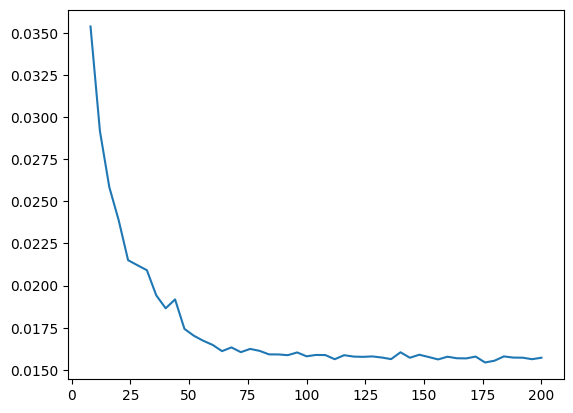

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(8,201,4)
print(x)

plt.plot(x,to_be_plotted_mse)
plt.show()

In [ ]:
from keras.models import load_model
print("Reduced vector eg")
#print(encoder(x_test[0].reshape(784,)))
#print(x_test[0])

#dense a bit more "sharper"
encoder = load_model('Models/encDense450.keras')  #encDense64    #encCNNNew
decoder = load_model('Models/decDense450.keras')  #decDense64    #decCNNNew

test_no = 123232
plt.imshow(x_train[test_no].reshape(28,28), cmap = "gray")
plt.show()

print(np.shape(x_train[test_no]))

lat = encoder.predict(x_train[test_no].reshape(-1,28,28))
print(lat)
#lat = lat.reshape(4,4,8)

output = decoder.predict(lat)


plt.imshow(output.reshape(28,28), cmap = "gray")
plt.show()



#decoder.inputs

#encoder.inputs

Reduced vector eg


ValueError: ignored